## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [161]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [4]:
#%tensorflow_version 2.x
#import tensorflow as tf
#tf.reset_default_graph()
#tf.set_random_seed(42)

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###4. Find no.of samples in training and test dataset

In [166]:
x_train.shape

(60000, 28, 28)

In [167]:
x_test.shape

(10000, 28, 28)

###5. Find dimensions of an image in the dataset

In [168]:
x_train[0].shape

(28, 28)

### 6. Verify if existing labels/Classes are correct 

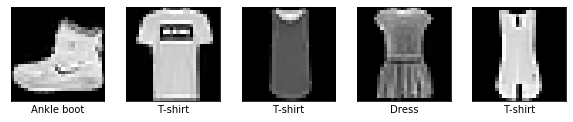

In [169]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model1 = Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model1.add(Reshape((28,28,1),input_shape=(28,28,)))

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#Add first convolutional layer
model1.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#Flatten the output
model1.add(Flatten())

In [0]:
#Dense layer
model1.add(Dense(128, activation='relu'))

#Output layer
model1.add(Dense(10, activation='softmax'))

In [0]:
model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [179]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
______________________________________________

In [180]:
#Train the model
model1.fit(x_train_norm,y_train_cat,          
          validation_data=(x_test_norm,y_test_cat),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.3615 - accuracy: 0.8702 - val_loss: 0.2734 - val_accuracy: 0.8964
Epoch 2/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2165 - accuracy: 0.9196 - val_loss: 0.2598 - val_accuracy: 0.9101
Epoch 3/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1511 - accuracy: 0.9434 - val_loss: 0.2463 - val_accuracy: 0.9168
Epoch 4/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1021 - accuracy: 0.9624 - val_loss: 0.2644 - val_accuracy: 0.9172
Epoch 5/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0662 - accuracy: 0.9756 - val_loss: 0.2869 - val_accuracy: 0.9203
Epoch 6/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0437 - accuracy: 0.9838 - val_loss: 0.3571 - val_accuracy: 0.9158
Epoch 7/10
60000/60000 [==========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model2 = Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model2.add(Reshape((28,28,1),input_shape=(28,28,)))

In [0]:
#Add first convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))


#Add MaxPooling layer
model2.add(MaxPool2D(pool_size=(2,2)))

#Add another dropout layer
model2.add(Dropout(0.25))

#Flatten the output
model2.add(Flatten())

In [0]:
#Dense layer
model2.add(Dense(128, activation='relu'))

#Output layer
model2.add(Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [185]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [186]:
#Train the model
model2.fit(x_train_norm,y_train_cat,          
          validation_data=(x_test_norm,y_test_cat),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3691 - accuracy: 0.8679 - val_loss: 0.2889 - val_accuracy: 0.8957
Epoch 2/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2376 - accuracy: 0.9129 - val_loss: 0.2532 - val_accuracy: 0.9093
Epoch 3/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.1870 - accuracy: 0.9296 - val_loss: 0.2277 - val_accuracy: 0.9160
Epoch 4/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1543 - accuracy: 0.9423 - val_loss: 0.2449 - val_accuracy: 0.9123
Epoch 5/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.1225 - accuracy: 0.9542 - val_loss: 0.2364 - val_accuracy: 0.9250
Epoch 6/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.1016 - accuracy: 0.9619 - val_loss: 0.2519 - val_accuracy: 0.9189
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [187]:
print('First Model Evaluation on test data: ')
results = model1.evaluate(x_test_norm, y_test_cat, verbose=0)
print('Test loss, Test Accuracy : ', results)

First Model Evaluation on test data: 
Test loss, Test Accuracy :  [0.5729416135455017, 0.9155]


In [188]:
print('Second Model Evaluation on test data: ')
results = model2.evaluate(x_test_norm, y_test_cat, verbose=0)
print('Test loss, Test Accuracy : ', results)

Second Model Evaluation on test data: 
Test loss, Test Accuracy :  [0.3106181385986507, 0.9251]


####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(x_train_norm)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

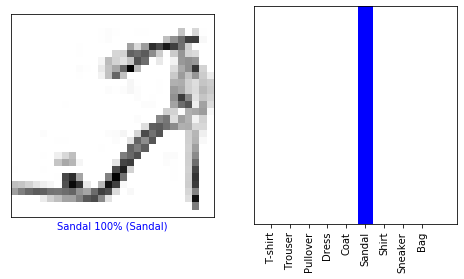

In [195]:
#Replace value of i with other index to check other product
i = 8
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
x_train_reshaped = tf.keras.backend.expand_dims(x_train_norm, axis = -1)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,rotation_range=45)

datagen.fit(x_train_reshaped)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

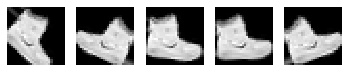

In [199]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshaped[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()